In [67]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np
import timeit
import math

# generate dataset
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_classification

# training method
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## NN

# feature preprocess
from sklearn.preprocessing import StandardScaler

# grid search


# evaluation
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [2]:
# data generate

In [3]:
X, y = make_classification(n_samples=1000, n_features=3, n_informative=2, n_redundant=1, n_classes=3, n_clusters_per_class=1, random_state=2017)

In [4]:
y[:5]

array([1, 0, 2, 1, 1])

In [5]:
np.mean(X[y==0], axis=0)

array([ 0.90779107,  0.64984184, -0.96530905])

class 0: center=[ 0.90779107  0.64984184 -0.96530905], ndata=334
class 1: center=[-0.98778854  1.04855655 -1.04175537], ndata=335
class 2: center=[-0.89324821 -0.62651245  0.93445001], ndata=331


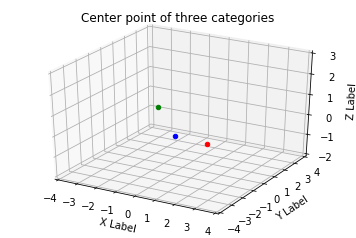

In [6]:
colorTag3d = ['red', 'blue', 'green']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(3):
    data = X[y==i]
    p = np.mean(data, axis=0) # center point
    print('class {}: center={}, ndata={}'.format(i, p, len(data)))
    ax.scatter(p[0], p[1], p[2], c=colorTag3d[i])
    
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([-2, 3])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('Center point of three categories')
plt.show()

In [7]:
# data observe

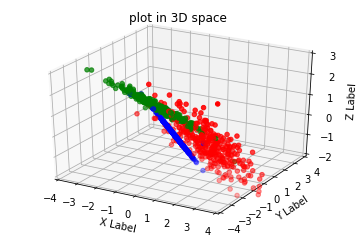

In [8]:
colorTag3d = ['red', 'blue', 'green']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter([_[0] for _ in X], [_[1] for _ in X], [_[2] for _ in X], c=[colorTag3d[_] for _ in y])
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([-2, 3])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('plot in 3D space')
plt.show()

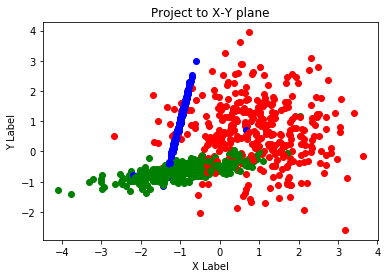

In [9]:
colorTag2d = ['ro', 'bo', 'go']

for a, b in zip(X, y):
    plt.plot(a[0], a[1], colorTag2d[b])
    
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Project to X-Y plane')
plt.show()

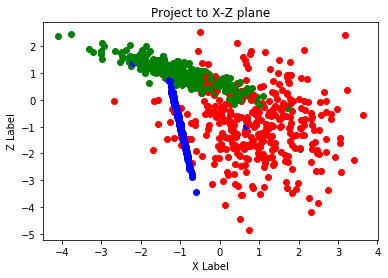

In [10]:
colorTag2d = ['ro', 'bo', 'go']

for a, b in zip(X, y):
    plt.plot(a[0], a[2], colorTag2d[b])
    
plt.xlabel('X Label')
plt.ylabel('Z Label')
plt.title('Project to X-Z plane')
plt.show()

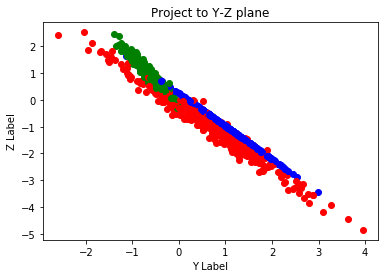

In [11]:
# redundant feature: Y, Z are are generated as linear combinations.

colorTag2d = ['ro', 'bo', 'go']

for a, b in zip(X, y):
    plt.plot(a[1], a[2], colorTag2d[b])
    
plt.xlabel('Y Label')
plt.ylabel('Z Label')
plt.title('Project to Y-Z plane')
plt.show()

In [12]:
print(X.shape, y.shape)
print(X[:5])
print(y[:5])

(1000, 3) (1000,)
[[-0.9437437   1.29077514 -1.33965773]
 [-0.14082934 -0.46558687  0.5844341 ]
 [ 0.63864632 -0.31455689  0.24051963]
 [-0.96283103  1.1995292  -1.2269104 ]
 [-0.99252151  1.01749536 -1.00374598]]
[1 0 2 1 1]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2017)
X_train.shape

(800, 3)

In [22]:
# tree = DecisionTreeClassifier()
# forest = RandomForestClassifier()
# lr = LogisticRegression()
# svm = SVC()

models = [
    ('tree', DecisionTreeClassifier()),
    ('forest', RandomForestClassifier()),
    ('lr', LogisticRegression()),
    ('svm', SVC()),
]

In [52]:
target_names = ['class 0', 'class 1', 'class 2']

for name, model in models:
    print('name: ' + name)
    tic = timeit.default_timer()
    model.fit(X_train, y_train)
    toc = timeit.default_timer()
    delta = toc - tic
    print('Training takes time: exp: {}'.format(math.exp(delta)))
    print('accuracy: {}'.format(model.score(X_test, y_test)))
    print(classification_report(y_true=y_test, y_pred=model.predict(X_test), target_names=target_names))
    print('-----\n')

name: tree
Training takes time: exp: 1.0018536830203972
accuracy: 0.9
             precision    recall  f1-score   support

    class 0       0.94      0.83      0.88        70
    class 1       0.94      0.97      0.96        69
    class 2       0.82      0.90      0.86        61

avg / total       0.90      0.90      0.90       200

-----

name: forest
Training takes time: exp: 1.0094740463025924
accuracy: 0.93
             precision    recall  f1-score   support

    class 0       0.94      0.90      0.92        70
    class 1       0.98      0.94      0.96        69
    class 2       0.87      0.95      0.91        61

avg / total       0.93      0.93      0.93       200

-----

name: lr
Training takes time: exp: 1.0019784926226591
accuracy: 0.875
             precision    recall  f1-score   support

    class 0       0.91      0.83      0.87        70
    class 1       0.94      0.90      0.92        69
    class 2       0.79      0.90      0.84        61

avg / total       0.88 

In [ ]:
# export tree graph
export_graphviz(models[0][1], out_file='tree.dot', feature_names=['X', 'Y', 'Z'])
! dot -Tpng tree.dot -o tree.png

X	0.44347027022648283
Y	0.38916443430996134
Z	0.1673652954635558


<function matplotlib.pyplot.show(*args, **kw)>

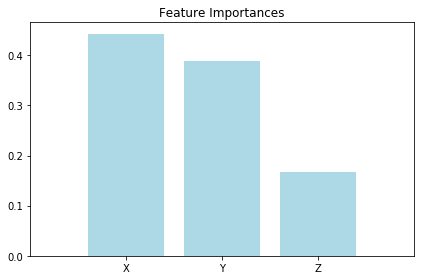

In [48]:
# random forest, feature importances
featureName = ['X', 'Y', 'Z']
importances = (models[1][1]).feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print('{}\t{}'.format(featureName[f], importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(X_train.shape[1]), featureName)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show

In [44]:
importances

array([0.44347027, 0.1673653 , 0.38916443])

In [54]:
# remove redundent 

target_names = ['class 0', 'class 1', 'class 2']

for name, model in models:
    print('name: ' + name)
    tic = timeit.default_timer()
    model.fit(X_train[:,:2], y_train)
    toc = timeit.default_timer()
    delta = toc - tic
    print('Training takes time: exp: {}'.format(math.exp(delta)))
    print('accuracy: {}'.format(model.score(X_test[:,:2], y_test)))
    print(classification_report(y_true=y_test, y_pred=model.predict(X_test[:,:2]), target_names=target_names))
    print('-----\n')

name: tree
Training takes time: exp: 1.00152892849753
accuracy: 0.915
             precision    recall  f1-score   support

    class 0       0.92      0.84      0.88        70
    class 1       0.97      0.97      0.97        69
    class 2       0.85      0.93      0.89        61

avg / total       0.92      0.92      0.91       200

-----

name: forest
Training takes time: exp: 1.0092085308875591
accuracy: 0.93
             precision    recall  f1-score   support

    class 0       0.94      0.90      0.92        70
    class 1       0.98      0.94      0.96        69
    class 2       0.87      0.95      0.91        61

avg / total       0.93      0.93      0.93       200

-----

name: lr
Training takes time: exp: 1.0018447915698703
accuracy: 0.875
             precision    recall  f1-score   support

    class 0       0.91      0.83      0.87        70
    class 1       0.94      0.90      0.92        69
    class 2       0.79      0.90      0.84        61

avg / total       0.88 

In [58]:
# Feature Scaling
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train[:,:2])
X_test_std = stdsc.transform(X_test[:,:2])

target_names = ['class 0', 'class 1', 'class 2']

for name, model in models:
    print('name: ' + name)
    tic = timeit.default_timer()
    model.fit(X_train[:,:2], y_train)
    toc = timeit.default_timer()
    delta = toc - tic
    print('Training takes time: exp: {}'.format(math.exp(delta)))
    print('accuracy: {}'.format(model.score(X_test[:,:2], y_test)))
    print(classification_report(y_true=y_test, y_pred=model.predict(X_test[:,:2]), target_names=target_names))
    print('-----\n')

name: tree
Training takes time: exp: 1.0011483989605525
accuracy: 0.915
             precision    recall  f1-score   support

    class 0       0.92      0.84      0.88        70
    class 1       0.99      0.97      0.98        69
    class 2       0.84      0.93      0.88        61

avg / total       0.92      0.92      0.92       200

-----

name: forest
Training takes time: exp: 1.0093297028508412
accuracy: 0.92
             precision    recall  f1-score   support

    class 0       0.94      0.89      0.91        70
    class 1       0.96      0.97      0.96        69
    class 2       0.86      0.90      0.88        61

avg / total       0.92      0.92      0.92       200

-----

name: lr
Training takes time: exp: 1.0021435861769987
accuracy: 0.875
             precision    recall  f1-score   support

    class 0       0.91      0.83      0.87        70
    class 1       0.94      0.90      0.92        69
    class 2       0.79      0.90      0.84        61

avg / total       0.8

In [59]:
# Overfit/Underfit
forest = RandomForestClassifier(n_estimators=10000)
forest.fit(X_train, y_train)
forest.score(X_train, y_train)

1.0

In [61]:
forest.score(X_test, y_test)

0.93

In [74]:
# CV all features
for name, model in models:
    print('name: ' + name)
    scores = cross_val_score(estimator=model, X=X, y=y, cv=10, n_jobs=-1)
    print('cv scores:', scores)
    print('accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
    print('-----\n')

name: tree
cv scores: [0.93137255 0.87128713 0.88118812 0.93069307 0.89       0.91919192
 0.8989899  0.93939394 0.92929293 0.90909091]
accuracy: 0.910 +/- 0.022
-----

name: forest
cv scores: [0.94117647 0.92079208 0.91089109 0.91089109 0.87       0.90909091
 0.92929293 0.92929293 0.94949495 0.94949495]
accuracy: 0.922 +/- 0.023
-----

name: lr
cv scores: [0.87254902 0.85148515 0.8019802  0.87128713 0.82       0.84848485
 0.93939394 0.8989899  0.88888889 0.91919192]
accuracy: 0.871 +/- 0.040
-----

name: svm
cv scores: [0.95098039 0.89108911 0.92079208 0.92079208 0.92       0.88888889
 0.95959596 0.92929293 0.93939394 0.93939394]
accuracy: 0.926 +/- 0.022
-----



In [75]:
# CV feature selection
for name, model in models:
    print('name: ' + name)
    scores = cross_val_score(estimator=model, X=X[:,:2], y=y, cv=10, n_jobs=-1)
    print('cv scores:', scores)
    print('accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
    print('-----\n')

name: tree
cv scores: [0.95098039 0.89108911 0.87128713 0.9009901  0.9        0.92929293
 0.8989899  0.93939394 0.92929293 0.91919192]
accuracy: 0.913 +/- 0.023
-----

name: forest
cv scores: [0.94117647 0.9009901  0.9009901  0.88118812 0.88       0.90909091
 0.92929293 0.95959596 0.93939394 0.95959596]
accuracy: 0.920 +/- 0.028
-----

name: lr
cv scores: [0.87254902 0.85148515 0.8019802  0.87128713 0.82       0.84848485
 0.93939394 0.8989899  0.88888889 0.91919192]
accuracy: 0.871 +/- 0.040
-----

name: svm
cv scores: [0.94117647 0.88118812 0.92079208 0.91089109 0.92       0.88888889
 0.95959596 0.95959596 0.92929293 0.93939394]
accuracy: 0.925 +/- 0.025
-----

